### **Name:** Frank Lin  
### **Date:** 10/30/2025  
### **Description:** HW8 - Exploratory data analysis on ChickWeight.csv

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ChickWeight.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  578 non-null    int64
 1   weight      578 non-null    int64
 2   Time        578 non-null    int64
 3   Chick       578 non-null    int64
 4   Diet        578 non-null    int64
dtypes: int64(5)
memory usage: 22.7 KB


In [3]:
df.head()

,Unnamed: 0,weight,Time,Chick,Diet
0,1,42,0,1,1
1,2,51,2,1,1
2,3,59,4,1,1
3,4,64,6,1,1
4,5,76,8,1,1


In [4]:
df.tail()

,Unnamed: 0,weight,Time,Chick,Diet
573,574,175,14,50,4
574,575,205,16,50,4
575,576,234,18,50,4
576,577,264,20,50,4
577,578,264,21,50,4


In [5]:
# Number of unique chicks
num_chicks = df['Chick'].nunique()
print(f"Number of unique chicks: {num_chicks}")

# Data points per chick
data_points_per_chick = df.groupby('Chick').size()
# print(f"Data points per chick: {data_points_per_chick}")

# Chicks per diet
chicks_per_diet = df.groupby('Diet')['Chick'].nunique()
print(f"Chicks per diet:\n{chicks_per_diet}")

Number of unique chicks: 50
Chicks per diet:
Diet
1    20
2    10
3    10
4    10
Name: Chick, dtype: int64


# Initial Questions
1. How does chick weight change over time across the different diets?
2. Do all diets promote growth in a similar manner, or do some promote more growth at certain periods than others.
3. Which diets show the greatest variability in chick weight by the end of the observation period?

# Description of Data
**Number of chicks:** 50  
**Data Points per chick:** Most chicks have 12  
**Chicks per diet**: Diet 1 had 20 chicks, the other diets had 10 each

In [6]:
# Adding a "total_weight_gain" column to track total weight gain over time for each chick
df['weight_gain_percent'] = df.groupby('Chick')['weight'].transform(lambda x: (x - x.iloc[0]) / x.iloc[0] * 100)

df.head()

,Unnamed: 0,weight,Time,Chick,Diet,weight_gain_percent
0,1,42,0,1,1,0.000000
1,2,51,2,1,1,21.428571
2,3,59,4,1,1,40.476190
3,4,64,6,1,1,52.380952
4,5,76,8,1,1,80.952381


# Plot 1 (Histogram)
This plot displays a histogram of the initial weights of each chick.

In [7]:
## Histogram of weights for each chick at time = 0
#plt.figure(figsize=(10, 6))
#sns.histplot(data=df[df['Time'] == 0], x='weight', bins=15)
#plt.title('Histogram of Initial Weights')
#plt.xlabel('Weight (grams)')
#plt.ylabel('Count')
#plt.show()

# Plot 2 (Boxplot)
This plot displays a box plot of the initial weights of each chick.

In [8]:
## Boxplot of weights at time = 0
#plt.figure(figsize=(10, 6))
#sns.boxplot(data=df[df['Time'] == 0]['weight'])
#plt.title('Initial Chick Weights')
#plt.ylabel('Weight (g)')
#plt.show()

# Plot 3 (Scatterplot)
This plot displays a scatterplot of the weight of each chick with respect to time, and colored by its diet.

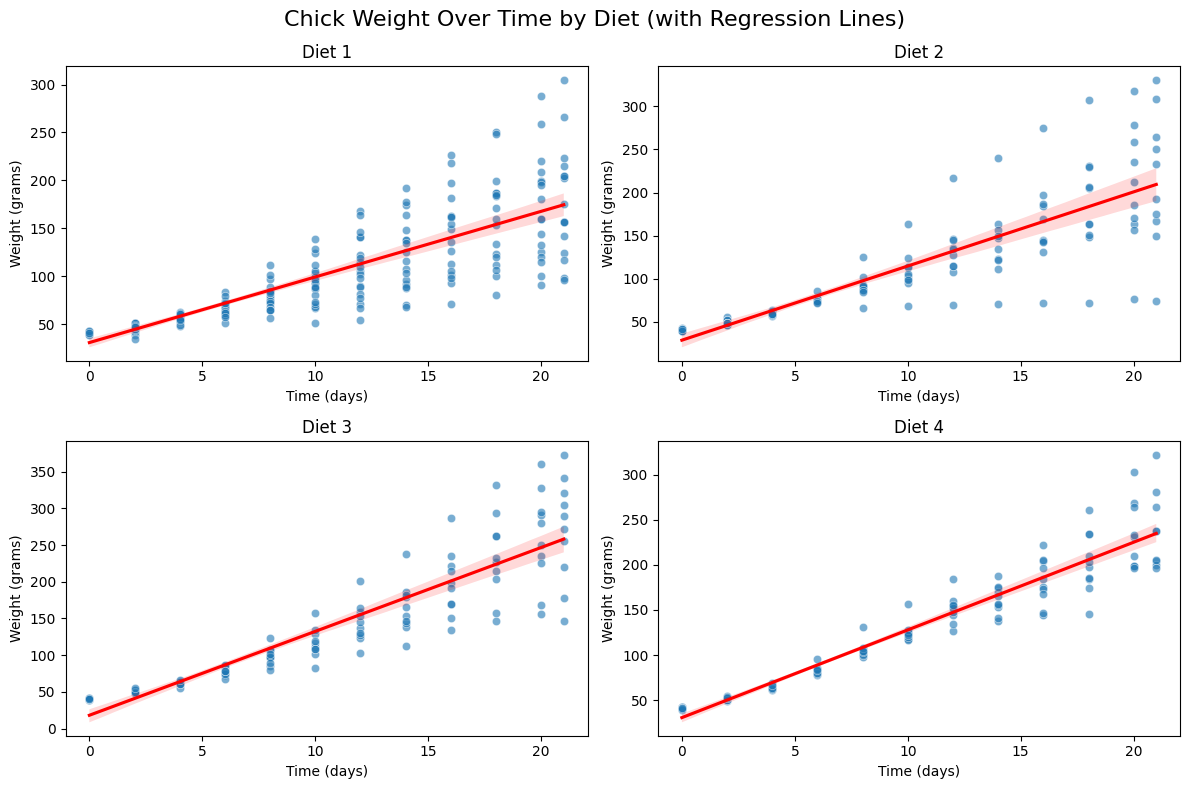

In [9]:
diets = sorted(df['Diet'].unique())
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, diet in zip(axes.flat, diets):
    subset = df[df['Diet'] == diet]
    
    # Scatterplot
    sns.scatterplot(data=subset, x='Time', y='weight', ax=ax, alpha=0.6)
    
    # Regression line
    sns.regplot(data=subset, x='Time', y='weight', ax=ax, scatter=False, color = 'red')
    
    ax.set_title(f'Diet {diet}')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Weight (grams)')

fig.suptitle("Chick Weight Over Time by Diet (with Regression Lines)", fontsize=16)
plt.tight_layout()
plt.show()

# Plot 4 (Line chart)
This plot displays a line chart of the average chick weight for each diet over time.

In [10]:
## Average weight over time for each diet
#avg_weight = df.groupby(['Time', 'Diet'])['weight'].mean().reset_index()
#plt.figure(figsize=(10, 6))
#sns.lineplot(data=avg_weight, x='Time', y='weight', hue='Diet', marker='o', palette='Set1')
#plt.title('Average Chick Weight over Time by Diet')
#plt.xlabel('Time (days)')
#plt.ylabel('Average Weight (grams)')
#plt.legend(title='Diet')
#plt.show()

# Plot 5 (Line chart)
This plot displays the average weight gain (measured in percent) for chicks of each diet over time.

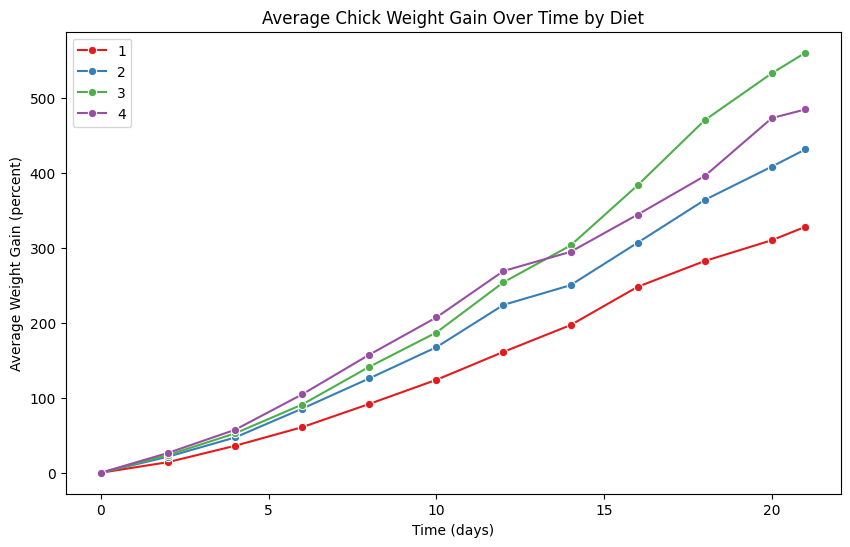

In [11]:
# Plot of average weight gain over time for each diet
avg_weight_gain_percent = df.groupby(['Time', 'Diet'])['weight_gain_percent'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_weight_gain_percent, x='Time', y='weight_gain_percent', hue='Diet', marker='o', palette='Set1')
plt.xlabel('Time (days)')
plt.ylabel('Average Weight Gain (percent)')
plt.title('Average Chick Weight Gain Over Time by Diet')
plt.legend()
plt.show()


# Plot 6 (Boxplot)
This plot displays the initial weights of chicks for each diet.

In [12]:
### Boxplot of Initial Weights by Diet
#plt.figure(figsize=(10, 6))
#final_weights = df[df.groupby('Chick')['Time'].transform('min') == df['Time']]
#sns.boxplot(data=final_weights, x='Diet', y='weight', hue = 'Diet')
#plt.title('Initial Chick Weights by Diet')
#plt.xlabel('Diet Type')
#plt.ylabel('Final Weight (g)')
#plt.show()

# Plot 7 (Boxplot) [Customization]
This plot displays the final weights of chicks for each diet. This plot includes customization, with numberical quartile labels being computed and displayed for each boxplot. The color palette has also been set to 'pastel' for easier visibility.

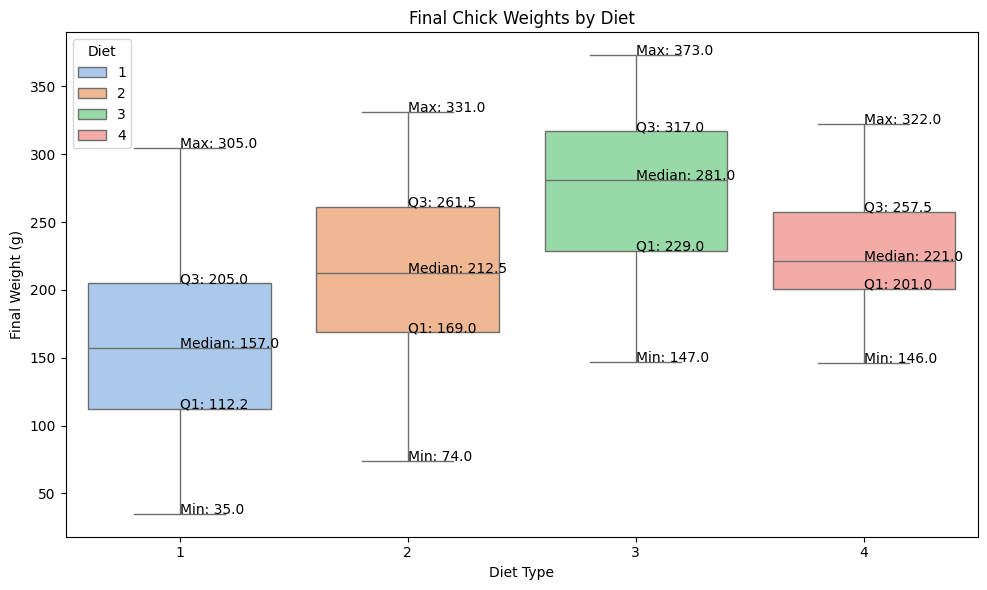

In [13]:
plt.figure(figsize=(10, 6))
final_weights = df[df.groupby('Chick')['Time'].transform('max') == df['Time']]
# Boxplot
sns.boxplot(data=final_weights, x='Diet', y='weight', hue='Diet', palette='pastel')
# Compute quartiles
summary = final_weights.groupby('Diet')['weight'].describe()[['min', '25%', '50%', '75%', 'max']]
# Annotate quartile values
for i, diet in enumerate(summary.index):
    stats = summary.loc[diet]
    plt.text(i, stats['min'], f"Min: {stats['min']:.1f}")
    plt.text(i, stats['25%'], f"Q1: {stats['25%']:.1f}")
    plt.text(i, stats['50%'], f"Median: {stats['50%']:.1f}")
    plt.text(i, stats['75%'], f"Q3: {stats['75%']:.1f}")
    plt.text(i, stats['max'], f"Max: {stats['max']:.1f}")

plt.title('Final Chick Weights by Diet')
plt.xlabel('Diet Type')
plt.ylabel('Final Weight (g)')
plt.legend(title='Diet')
plt.tight_layout()
plt.show()

# Plot 8 (Bar plot)
This plot displays the final average chick weight of each diet.

In [14]:
## Average final chick weights by diet
#plt.figure(figsize=(10, 6))
#mean_weights = df.groupby('Diet')['weight'].mean().reset_index()
#sns.barplot(data=mean_weights, x='Diet', y='weight')
#plt.title('Average Chick Weight by Diet')
#plt.xlabel('Diet Type')
#plt.ylabel('Average Weight (grams)')
## Include weight values
#for index, row in mean_weights.iterrows():
#    plt.text(index, row['weight'], round(row['weight'], 2), color='black', ha="center")
#plt.show()

# Final Observations
1. The weight for all chicks increased from birth. Diet 3 seemed to be the most effective, demonstrating the highest average growth.
2. The growth pattern is pretty similar from all diets, showing a linear growth over time.
3. Diet 4 has the lowest variation in final chick weight amongst the four diets.
4. Diet 1 has 20 chicks, instead of the 10 for the other diets. I wonder why this is the case, perhaps it is the baseline diet we are measuring against?